AVERAGE PRICE
[275.0, 275.0, 160.0, 160.0, 95.0, 95.0, 165.0, 160.0, 165.0, 160.0, 165.0, 160.0, 155.0, 160.0, 155.0, 150.0, 130.0, 145.0, 130.0, 125.0, 115.0, 95.0, 110.0, 160.0, 160.0, 155.0, 155.0, 170.0, 180.0, 380.0, 380.0, 380.0, 200.0, 275.0, 350.0, 180.0, 200.0, 190.0, 190.0, 340.0, 245.0, 200.0, 340.0, 245.0, 190.0, 29.0, 29.0, 28.5, 28.5, 29.0, 29.0, 15.0, 24.0, 15.0, 255.0, 255.0, 255.0, 255.0, 247.5, 255.0, 242.5, 235.0, 230.0, 230.0, 215.0, 215.0, 200.0, 200.0, 215.0, 210.0, 15.0, 18.0, 18.0, 17.0, 15.0, 18.0, 17.0, 17.75, 15.0, 17.0, 17.75, 15.0, 17.0, 17.75, 15.0, 16.5, 17.0, 18.0, 16.0, 18.0, 16.0, 16.0, 16.0, 160.0, 200.0, 195.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 50.0, 50.0, 55.0, 55.0, 55.0, 50.0, 50.0, 55.0, 55.0, 50.0, 55.0, 55.0, 55.0, 50.0, 50.0, 200.0, 240.0, 240.0, 18.0, 15.0, 18.0, 15.0, 17.0, 15.0, 16.5, 16.5, 17.0, 15.0, 15.0, 16.5, 17.0, 15.0, 15.0, 16.5, 17.0, 16.0, 15.0, 16.5, 17.0, 16.5, 18.0, 18.0, 18.0, 18.0, 18.0, 15.0, 15.0, 15.0, 

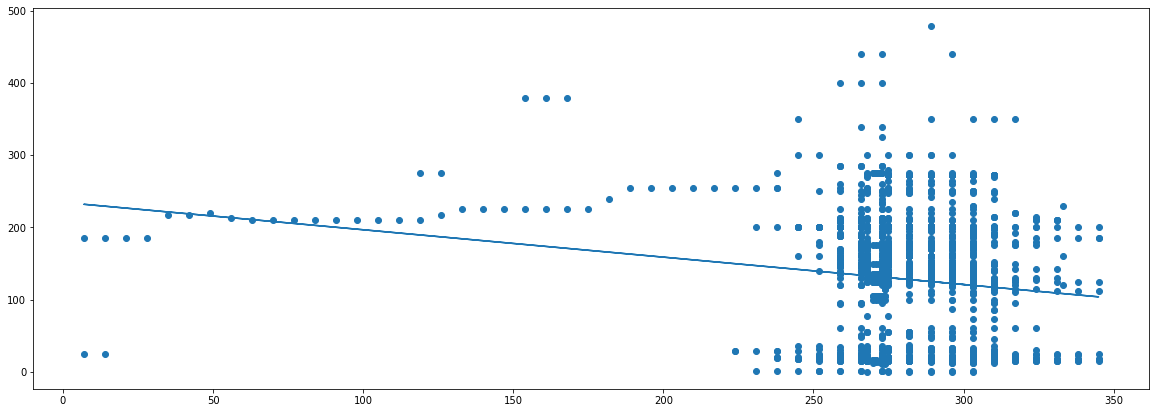

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import datetime, date


# Functions
def getListByCsvColumn(column):
    return pumpkins[column].to_list()

pumpkins = pd.read_csv('./US-pumpkins.csv')

low_price = getListByCsvColumn('Low Price')
high_price = getListByCsvColumn('High Price')
dateYear = getListByCsvColumn('Date')
package = getListByCsvColumn('Package')


dayOfYear = []
average_price = []

for h_index, h_price in enumerate(high_price):
    for l_index, l_price in enumerate(low_price):
        if h_index == l_index:
           a_price = (l_price + h_price) /2
           average_price.append(a_price)

print("AVERAGE PRICE")
print(average_price)

dayOfYearList = []

for d in dateYear:
    splittedDate = d.split('/')
    day_of_year = date(2000 + int(splittedDate[2]), int(splittedDate[0]), int(splittedDate[1])).timetuple().tm_yday
    dayOfYearList.append(day_of_year)

print("DAY OF YEAR LIST")
print(dayOfYearList)




X_train, X_test, y_train, y_test = train_test_split(np.array(dayOfYearList).reshape(-1, 1), np.array(average_price).reshape(-1, 1), test_size=0.2)

pipeline = LinearRegression().fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

plt.figure(figsize=(20, 7))
plt.scatter(dayOfYearList, average_price)
plt.plot(X_test, pred)
plt.show()

# lin_reg = LinearRegression().fit(X_train,y_train)

# pred = lin_reg.predict(X_test)

# mse = np.sqrt(mean_squared_error(y_test,pred))
# print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

# score = lin_reg.score(X_train,y_train)
# print('Model determination: ', score)
